<a href="https://colab.research.google.com/github/adiahuja06/Deep-Learning/blob/master/Digit_Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

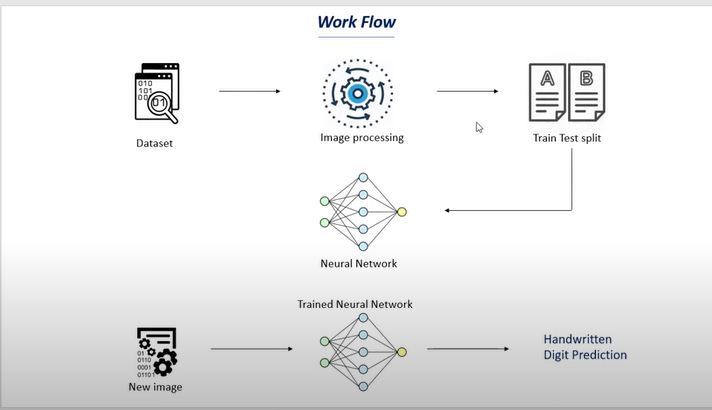

In [ ]:
#The above is the flow. We should have our dataset and then we need to process image and then we need to split the data and then we train our model
#Then we will have to put new image and then check our prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist  #dataset to be imported
from tensorflow.math import confusion_matrix
#this is a multi class classification problem as we have digits ranging from 0-9

In [3]:
#In this dataset the data is already splitted in training and testing so we need not do any kind of image processing
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


So we have 60,000 images of 28X28 pixwl in the numpy array of X_train and we have 60,000 validating bits ranging from 0-9

Similarly for test data we have 10,000 of 28X28 pixels which is in grayscale and Y_train contains validating bits

Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [7]:
#Lets print the 10th image
print(X_train[9])
#A 28X28 matrix containing value between 0-9

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [8]:
print(X_train[10].shape)

(28, 28)


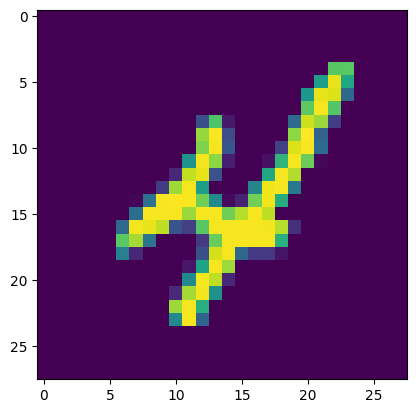

4


In [9]:
# displaying the image , converting the array into the image

plt.imshow(X_train[9])
plt.show()

# print the corresponding label
print(Y_train[9])

In [10]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [11]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

#This shows that it is a classification problem

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


So you can use multi class classification in for this and for that we have to convert the above data to hot encoded
0-100000000
1-010000000
2-001000000
3-000100000
4-000010000
5-000001000
6-000000100
7-000000010
8-000000001

In [13]:
#So now we will be performing convolution before providing this layer to the neural network so we need to scale the data
X_train = X_train/255
X_test = X_test/255
#so all values will range between 0 and 1 now this is just to bring data in one range

In [14]:
print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [31]:
#Building the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #in this since data is in form of matrix but we need to give data to the neurons in single dimesnion hence we enter the matrix dimension
                          keras.layers.Dense(50, activation='relu'), #add a hidden layer with 50 neurons and each neuron will be connected to previous value
                          keras.layers.Dense(50, activation='relu'), #another hidden layer
                          keras.layers.Dense(10, activation='softmax') #the last layer that we have is of softmax since it is multi class classification
                          #note that the last layer should consist of same number of neurons as the number of classes in dataset. They all act as GATES
])

In [32]:
#in order to reduce the loss we will need to do backward propogation and for that we will have to choose an optimizer and a loss function
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
#train our nrural network
model.fit(X_train,Y_train,validation_split=0.1,batch_size=40,epochs=10)

Epoch 1/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9271 - val_loss: 0.1986 - val_accuracy: 0.9422
Epoch 2/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2351 - accuracy: 0.9312 - val_loss: 0.1925 - val_accuracy: 0.9412
Epoch 3/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2241 - accuracy: 0.9334 - val_loss: 0.1822 - val_accuracy: 0.9472
Epoch 4/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2130 - accuracy: 0.9367 - val_loss: 0.1753 - val_accuracy: 0.9505
Epoch 5/10
1350/1350 [==============================] - 6s 4ms/step - loss: 0.2034 - accuracy: 0.9397 - val_loss: 0.1712 - val_accuracy: 0.9503
Epoch 6/10
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1956 - accuracy: 0.9411 - val_loss: 0.1638 - val_accuracy: 0.9515
Epoch 7/10
1350/1350 [==============================] - 6s 5ms/step - loss: 0.1870 - accuracy: 0.9444 - val_loss: 0.1543 - val_accuracy:

If your train data prediction is coming very high then and when you find accuracy on test data and it is coming very low then the model is overfitted

Accuracy on test data

In [38]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1681 - accuracy: 0.9513
0.9513000249862671


Test data accuracy is 95.1%

Lets check the model by providing it with the image

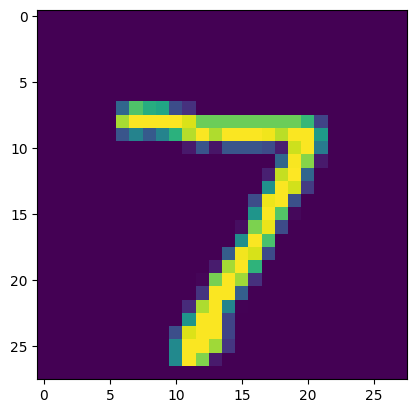

In [37]:
plt.imshow(X_test[0])
plt.show()

In [42]:
Y_pred=model.predict(X_test) #so this will predict the probability for each and every output in classification and one with maximum value needs to be considered

313/313 [==============================] - 1s 4ms/step


In [45]:
print(Y_pred.shape) #In this we have 10,000 entries and for each entry we have array containing 10 values with probability for each classification

(10000, 10)


In [47]:
print(Y_pred[0]) #so we will have an array corresponding to probability of each category

[1.6882841e-05 2.7516318e-09 1.3883918e-03 1.4339909e-03 5.6738636e-10
 1.1697743e-04 4.0486305e-13 9.9692744e-01 1.8636027e-05 9.7723110e-05]


In [48]:
#so we need to convert it into labels
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [49]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion matrix
We know that for classification problems we have to use confusion matrix as our evaluation matrix

In [51]:
#Y_test is the actual value of 10,000 images and Y_pred_labels is the value predicted by our system
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [52]:
print(conf_mat)

tf.Tensor(
[[ 956    0    2    1    0    7   10    1    2    1]
 [   0 1115    3    2    0    2    3    2    8    0]
 [   9    4  973   14    3    1    7    6   12    3]
 [   1    1   17  954    0   15    0    8   11    3]
 [   0    1    4    0  932    1    9    2    4   29]
 [   8    5    3   20    7  817   10    1   15    6]
 [   5    4    3    1    3    9  931    0    2    0]
 [   1    8   15   10    2    2    0  973    0   17]
 [   4    4    3   13    6   15    6    8  912    3]
 [   4    9    0    7   13   11    0    9    6  950]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Value')

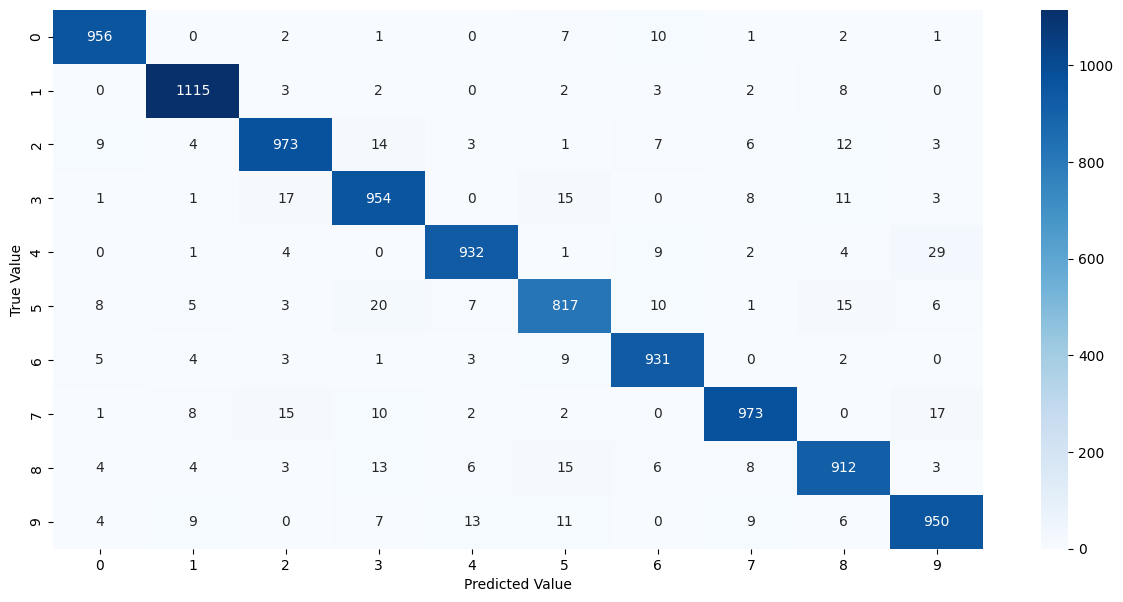

In [55]:
#we can built a hetmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')

Building a predictive model

In [56]:
!wget 'https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67'

--2023-06-16 19:31:23--  https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3225 (3.1K) [image/png]
Saving to: ‘68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67’

68747470733a2f2f646 100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-06-16 19:31:23 (38.0 MB/s) - ‘68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67’ s

In [57]:
input_image_path = '/content/digit.png'

input_image = cv2.imread(input_image_path)

In [59]:
type(input_image)

numpy.ndarray

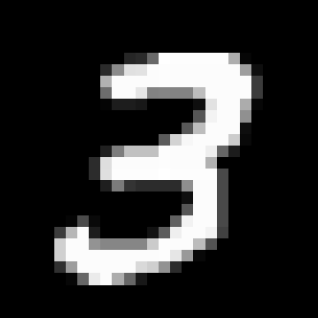

In [60]:
cv2_imshow(input_image)

In [61]:
#checking size of the image once converted to array
input_image.shape

(318, 318, 3)

In [ ]:
#since all other images are in 28X28 we need to bring this image in same dimension
#Bur before that we convert it to grayscale as RGB

In [62]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [63]:
grayscale.shape

(318, 318)

In [64]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [66]:
input_image_resize.shape

(28, 28)

In [67]:
cv2_imshow(input_image_resize)

In [69]:
#Now our image is ready and we just need to scale it
input_image_resize = input_image_resize/255

In [73]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])
#this is done for just one value we need to reshape it

In [74]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[2.0423014e-09 1.4324788e-08 4.3757856e-05 9.9992478e-01 8.8933157e-15
  7.1444729e-06 1.3693392e-15 3.6465870e-08 2.3395527e-05 9.0092351e-07]]


In [75]:
input_pred_label = np.argmax(input_prediction)

In [76]:
print(input_pred_label)

3
